In [1]:
!git clone https://github.com/ChaitaliV/Objective-criterias-to-quantify-the-accuracy-of-explanation

Cloning into 'Objective-criterias-to-quantify-the-accuracy-of-explanation'...
remote: Enumerating objects: 405, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 405 (delta 10), reused 3 (delta 3), pack-reused 382
Receiving objects: 100% (405/405), 24.33 MiB | 14.33 MiB/s, done.
Resolving deltas: 100% (198/198), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append('Objective-criterias-to-quantify-the-accuracy-of-explanation/dd_classification')

In [4]:
!pip install tensorflow-text
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 60.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.6 MB/s eta 0:00:00


In [40]:
from utils import *
from model import *
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import gensim
from gensim.models import LdaModel
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import CoherenceModel

In [6]:
model_path = '/content/drive/MyDrive/model'

In [12]:
# load all test data
x_test,y_test = load_pkl_data(test_pkl)
print("%d Validation Data loaded"%(len(x_test)))

203 Validation Data loaded


In [18]:
df = pd.read_csv('/content/Objective-criterias-to-quantify-the-accuracy-of-explanation/Dataset/test.csv')
df.head()

,hindi_text,label
0,मैं न्यूयॉर्क में अपने दादा-दादी के साथ पैदा ह...,0
1,मैं किशोरावस्था से ही गंभीर अवसाद के दौर से गु...,1
2,मुझे शौक के तौर पर खाना बनाना पसंद है,0
3,"मैं इन दिनों बहुत कम महसूस कर रहा हूं, ऐसा महस...",1
4,हाल ही में ब्रिटेन की महारानी एलिजाबेथ का निधन...,2


In [21]:
x_test = df['hindi_text'][:]
y_test = df['label'][:]

In [22]:
# load label maps
label2ind = load_dict_from_json(label2ind_json)
ind2label = load_dict_from_json(ind2label_json)
print("Labels loaded")
nc = len(label2ind.keys())
print("Total %d classes"%nc)

Labels loaded
Total 2 classes


In [53]:
model = AttentionClassifier(nc)
print("Model created")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'bert.embeddings.position_ids', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the 

Model created


In [54]:
model.load_model(model_path)

Model restored weights from /content/drive/MyDrive/model/ckpt-3


In [55]:
word_attention,label = model.predict_with_explain(x_test[0],ind2label)
for w in word_attention:
    print(w[0],w[1])

intro
[CLS] 0.05483622848987579
मैं 0.05573181062936783
न्यूयॉर्क 0.05522977188229561
में 0.05570235103368759
अपने 0.055829957127571106
दादा 0.055679693818092346
- 0.05562558397650719
दादी 0.055690325796604156
के 0.05580134689807892
साथ 0.05574402958154678
पैदा 0.05577230826020241
हुई 0.05573735013604164
और 0.05579153820872307
पली 0.11086766794323921
- 0.055589865893125534
बढ़ी 0.0555340014398098
[SEP] 0.05483622848987579


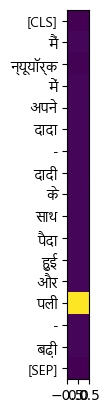

In [31]:
scores = []
words = []
for w,a in word_attention:
    scores.append(a)
    words.append(w)
# scores = np.log(scores)
hindi_font = FontProperties(fname = '/content/drive/MyDrive/Nirmala.ttf')
plt.imshow(np.expand_dims(scores,1))
plt.yticks(range(len(words)),words,rotation=0,fontproperties=hindi_font)
plt.show()

## Proximity

intro


In [38]:
exp_text

'मैं में अपने दादा - दादी के साथ पैदा हुई और पली'

## Stability

## Coherence


In [39]:
train = pd.read_csv(r'/content/drive/MyDrive/data.csv')

In [41]:
documents = train['Text'][:].tolist()
# Create a dictionary from your text data
dataset = [d.split() for d in documents]
dictionary = corpora.Dictionary(dataset)

# Create a corpus from your dictionary and text data
corpus = [dictionary.doc2bow(doc) for doc in dataset]

In [42]:
# Train an LDA model on your corpus
num_topics = 10  # Change this to the number of topics you want to extract
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     random_state=100,
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

In [43]:
def coherence_score(important_words):
  # Compute the coherence score using the list of important words and the LDA model
  coherence_model_lda = CoherenceModel(model=lda_model, texts=[important_words], dictionary=dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  return coherence_lda

In [44]:
# Use LDA to evaluate the quality of the LIME explanations
vectorizer = CountVectorizer( max_df=5, min_df=0.01)
lda = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', random_state=42)

In [56]:
def explainer(text):
  word_attention,label = model.predict_with_explain(x_test[0],ind2label)
  features,values = [],[]
  important_features = []
  for w,a in word_attention:
      values.append(a)
      features.append(w)
  return features

In [57]:
def get_score(text):
  features = explainer(text)
  X = vectorizer.fit_transform(features)
  lda.fit(X)
  return lda.score(X)

In [60]:
# load all test data
x_test,y_test = load_pkl_data(test_pkl)
print("%d Validation Data loaded"%(len(x_test)))

203 Validation Data loaded


In [ ]:
coherence_score = []
for text in x_test:
  coherence_score.append(get_score(text))

intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro
intro


In [59]:
coherence_score

[-28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854773691,
 -28.50222854